# Теория вероятностей в Data Science на примере данных об обнаружении мошеннеческих транзакций

**Цель:** Исследуем фундаментальные понятия теории веростностей, используя 
данные о мошеннеческих транзакциях по кредитным картам. Ответим на конкретные вопросы, используя
условную вероятность, формулу полной вероятности и теорему Байеса.

Источник данных: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

---

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Настройка отображения
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.4f}'.format)

##  Загрузка данных и их описание

In [2]:
df = pd.read_csv('Data/creditcard.csv')
print("Размерность данных: ", df.shape)

Размерность данных:  (284807, 31)


In [3]:
# Быстрый взгляд на данные
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


## Описание признаков набора данных

In [4]:
print("\nКолонки: ", df.columns.tolist())


Колонки:  ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Проверим пропущенные значения
print("Пропущенные значения: ")
missing_data = df.isnull().sum()
missing_persent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Количество пропусков': missing_data,
                          'Процент пропусков': missing_persent.round(2)})
missing_df.head(31)

Пропущенные значения: 


,Количество пропусков,Процент пропусков
Time,0,0.0000
V1,0,0.0000
V2,0,0.0000
V3,0,0.0000
V4,0,0.0000
V5,0,0.0000
V6,0,0.0000
V7,0,0.0000
V8,0,0.0000
V9,0,0.0000


## Описание признаков набора данных

|Признак|Тип|Описание|Особенности|
|---|---|---|---|
|Time|Числовой|Время в секундах с момента первой транзакции| Нужно преобразовать в категории (ночь/день)|
|V1-V28|Числовой|Результаты PCA-преобразования|Анонимизированные признаки для защиты данных|
|Amount|Числовой|Сумма транзакции||
|Class|Бинарный|Класс транзакции (0 - нормальная, 1 - мошенническая)|Целевая переменная|

### Создадим сводную таблицу для первоначального взгляда

In [7]:
# Базовая статистика по сумме транзакций и классу
print("Распределение классов:")
class_distribution = df['Class'].value_counts()
class_percentage = df['Class'].value_counts(normalize=True) * 100

class_stats = pd.DataFrame({
    'Количество': class_distribution,
    'Процент': class_percentage.round(2)
})
print(class_stats)

print(f"\nОбщее количество транзакций: {len(df)}")
print(f"Количество мошеннических транзакций: {class_distribution[1]} ({class_percentage[1]:.2f}%)")
print(f"Соотношение нормальных к мошенническим: {class_distribution[0]/class_distribution[1]:.0f}:1")

Распределение классов:
       Количество  Процент
Class                     
0          284315  99.8300
1             492   0.1700

Общее количество транзакций: 284807
Количество мошеннических транзакций: 492 (0.17%)
Соотношение нормальных к мошенническим: 578:1


## Визуализация распределения классов

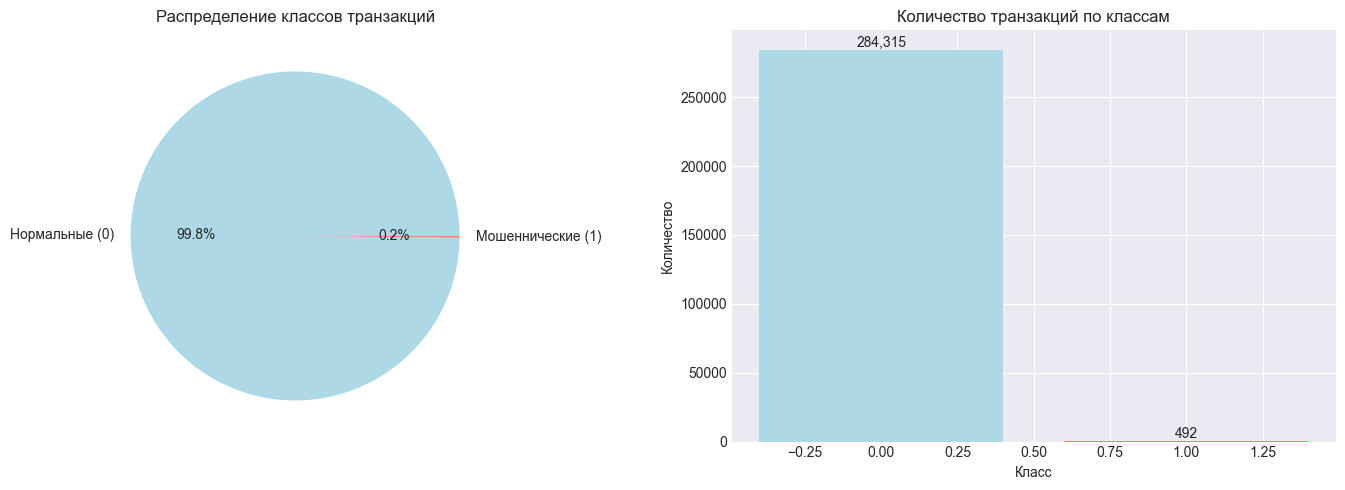

In [8]:
# Визуализация распределения классов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Круговая диаграмма
axes[0].pie(class_stats['Количество'], labels=['Нормальные (0)', 'Мошеннические (1)'], 
           autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[0].set_title('Распределение классов транзакций')

# Столбчатая диаграмма
bars = axes[1].bar(class_stats.index, class_stats['Количество'], color=['lightblue', 'salmon'])
axes[1].set_title('Количество транзакций по классам')
axes[1].set_xlabel('Класс')
axes[1].set_ylabel('Количество')

# Добавляем подписи значений
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Создание категорий для анализа

Для анализа условных вероятностей нам нужно преобразовать непрерывные признаки в категории:
- Преобразуем время в категории (ночь/день/вечер)
- Преобразуем сумму в категории (низкая/средняя/высокая/очень высокая)
- Создадим бинарные признаки для некоторых V-признаков

In [9]:
# Преобразуем время в категории (ночь/день/вечер)
df['Time_Hour'] = df['Time'] // 3600
df['Time_Category'] = pd.cut(df['Time_Hour'], 
                             bins=[-1, 6, 12, 18, 24], 
                             labels=['Ночь', 'Утро', 'День', 'Вечер'])

# Создаем категории по сумме транзакции
df['Amount_Category'] = pd.qcut(df['Amount'], q=4, labels=['Низкая', 'Средняя', 'Высокая', 'Очень высокая'])

# Создаем бинарные признаки для некоторых V-признаков (аномалии)
# Используем порог 2
df['V1_Anomaly'] = np.abs(df['V1']) > 2
df['V4_Anomaly'] = np.abs(df['V4']) > 2
df['V14_Anomaly'] = np.abs(df['V14']) > 2

print("Созданные категориальные признаки:")
df[['Time_Category', 'Amount_Category', 'V1_Anomaly', 'V4_Anomaly', 'V14_Anomaly', 'Class']].head()

Созданные категориальные признаки:


,Time_Category,Amount_Category,V1_Anomaly,V4_Anomaly,V14_Anomaly,Class
0,Ночь,Очень высокая,False,False,False,0
1,Ночь,Низкая,False,False,False,0
2,Ночь,Очень высокая,False,False,False,0
3,Ночь,Очень высокая,False,False,False,0
4,Ночь,Высокая,False,False,False,0


## Вероятности и условные вероятности
### Простые вероятности

Вычислим некоторые априорные вероятности.

In [10]:
print("ПРОСТЫЕ ВЕРОЯТНОСТИ:")
print("=" * 50)

# 1. Вероятность мошеннической транзакции
P_Fraud = df['Class'].mean()
print(f"1. P(Мошенническая) = Вероятность мошеннической транзакции = {P_Fraud:.6f}")

# 2. Вероятность нормальной транзакции
P_Normal = 1 - P_Fraud
print(f"2. P(Нормальная) = Вероятность нормальной транзакции = {P_Normal:.6f}")

# 3. Вероятность транзакции ночью
P_Night = (df['Time_Category'] == 'Ночь').mean()
print(f"3. P(Ночь) = Вероятность транзакции ночью = {P_Night:.4f}")

# 4. Вероятность высокой суммы транзакции
P_High_Amount = (df['Amount_Category'] == 'Высокая').mean()
print(f"4. P(Высокая сумма) = Вероятность высокой суммы транзакции = {P_High_Amount:.4f}")

# 5. Вероятность аномалии в V1
P_V1_Anomaly = df['V1_Anomaly'].mean()
print(f"5. P(V1 Аномалия) = Вероятность аномалии в V1 = {P_V1_Anomaly:.4f}")

ПРОСТЫЕ ВЕРОЯТНОСТИ:
1. P(Мошенническая) = Вероятность мошеннической транзакции = 0.001727
2. P(Нормальная) = Вероятность нормальной транзакции = 0.998273
3. P(Ночь) = Вероятность транзакции ночью = 0.0498
4. P(Высокая сумма) = Вероятность высокой суммы транзакции = 0.2492
5. P(V1 Аномалия) = Вероятность аномалии в V1 = 0.2016


### Условные вероятности

**Задача 1.** Какова вероятность мошенничества, если транзакция совершена носью?

Формула: $$P(\text{Мошенническая | ночь}) = \frac {P(\text{Мошенничесая и ночь})} {P(\text{ночь})}$$

In [11]:
print("УСЛОВНЫЕ ВЕРОЯТНОСТИ:")
print("=" * 50)

# Способ 1: Вручную по формуле
night_transactions = df[df['Time_Category'] == 'Ночь']
P_Night = (df['Time_Category'] == 'Ночь').mean()
P_Fraud_and_Night = ((df['Class'] == 1) & (df['Time_Category'] == 'Ночь')).mean()

P_Fraud_if_Night = P_Fraud_and_Night / P_Night
print(f"Задача 1: P(Мошенническая | Ночь), рассчитанная вручную: {P_Fraud_if_Night:.6f}")

# Способ 2: Просто отфильтруем датафрейм и посчитаем среднее
P_Fraud_if_Night_filter = night_transactions['Class'].mean()
print(f"Задача 1: P(Мошенническая | Ночь), рассчитанная через фильтр: {P_Fraud_if_Night_filter:.6f}")

УСЛОВНЫЕ ВЕРОЯТНОСТИ:
Задача 1: P(Мошенническая | Ночь), рассчитанная вручную: 0.004093
Задача 1: P(Мошенническая | Ночь), рассчитанная через фильтр: 0.004093


**Задача 2.** Какова вероятность мошенничества, если сумма транзакции высокая?

Формула: $$P(\text{Мошенническая | Высокая сумма)} = \frac {P(\text{Мошенническая и Высокая сумма})} {P(\text{Высокая сумма})}$$

In [12]:
# Способ 1: Вручную по формуле
high_amount = df[df['Amount_Category'] == 'Высокая']
P_High_Amount = (df['Amount_Category'] == 'Высокая').mean()
P_Fraud_and_High_Amount = ((df['Class'] == 1) & (df['Amount_Category'] == 'Высокая')).mean()

P_Fraud_if_High_Amount = P_Fraud_and_High_Amount / P_High_Amount
print(f"Задача 2: P(Мошенническая | Высокая сумма), рассчитанная вручную: {P_Fraud_if_High_Amount:.6f}")

# Способ 2: Просто отфильтруем датафрейм и посчитаем среднее
P_Fraud_if_High_Amount_filter = high_amount['Class'].mean()
print(f"Задача 2: P(Мошенническая | Высокая сумма), рассчитанная через фильтр: {P_Fraud_if_High_Amount_filter:.6f}")

Задача 2: P(Мошенническая | Высокая сумма), рассчитанная вручную: 0.000662
Задача 2: P(Мошенническая | Высокая сумма), рассчитанная через фильтр: 0.000662


**Задача 3.** Какова вероятность мошенничества, если есть аномалия в V1?

Формула: $$P(\text{Мошенническая | V1)} = \frac {P(\text{Мошенническая и V1})} {P(\text{V1})}$$

In [13]:
# Способ 1: Вручную по формуле
V1_anomaly = df[df['V1_Anomaly'] == True]
P_V1_Anomaly = df['V1_Anomaly'].mean()
P_Fraud_and_V1_Anomaly = ((df['Class'] == 1) & (df['V1_Anomaly'] == True)).mean()

P_Fraud_if_V1_Anomaly = P_Fraud_and_V1_Anomaly / P_V1_Anomaly
print(f"Задача 3: P(Мошенническая | V1 Аномалия), рассчитанная вручную: {P_Fraud_if_V1_Anomaly:.6f}")

# Способ 2: Просто отфильтруем датафрейм и посчитаем среднее
P_Fraud_if_V1_Anomaly_filter = V1_anomaly['Class'].mean()
print(f"Задача 3: P(Мошенническая | V1 Аномалия), рассчитанная через фильтр: {P_Fraud_if_V1_Anomaly_filter:.6f}")

Задача 3: P(Мошенническая | V1 Аномалия), рассчитанная вручную: 0.004737
Задача 3: P(Мошенническая | V1 Аномалия), рассчитанная через фильтр: 0.004737


### Обобщение вычисления условных вероятностей

Поскольку при вычислении условных вероятностей прослеживается общая схема их расчёта, 
напишем функцию для вычисления условных вероятностей:

In [14]:
def conditional_probability(df, condition_col, condition_val, target_col, target_val=1):
    """
    Вычисляет условную вероятность
    P(target_col=target_val | condition_col=condition_val)
    """
    subset = df[df[condition_col] == condition_val]
    if len(subset) == 0:
        return 0
    return (subset[target_col] == target_val).mean()

print("УСЛОВНЫЕ ВЕРОЯТНОСТИ МОШЕННИЧЕСТВА:")
print("=" * 60)

# По времени суток
print("\nПо времени суток:")
for time_cat in df['Time_Category'].unique():
    prob = conditional_probability(df, 'Time_Category', time_cat, 'Class')
    print(f" P(Мошенническая | Время={time_cat}) = {prob:.6f}")

# По категории суммы
print("\nПо категории суммы:")
for amount_cat in df['Amount_Category'].unique():
    prob = conditional_probability(df, 'Amount_Category', amount_cat, 'Class')
    print(f" P(Мошенническая | Сумма={amount_cat}) = {prob:.6f}")

# По аномалиям в признаках
print("\nПо аномалиям в признаках:")
for anomaly_col in ['V1_Anomaly', 'V4_Anomaly', 'V14_Anomaly']:
    for val in [True, False]:
        prob = conditional_probability(df, anomaly_col, val, 'Class')
        print(f" P(Мошенническая | {anomaly_col}={val}) = {prob:.6f}")

УСЛОВНЫЕ ВЕРОЯТНОСТИ МОШЕННИЧЕСТВА:

По времени суток:
 P(Мошенническая | Время=Ночь) = 0.004093
 P(Мошенническая | Время=Утро) = 0.002368
 P(Мошенническая | Время=День) = 0.001613
 P(Мошенническая | Время=Вечер) = 0.001161
 P(Мошенническая | Время=nan) = 0.000000

По категории суммы:
 P(Мошенническая | Сумма=Очень высокая) = 0.002444
 P(Мошенническая | Сумма=Низкая) = 0.003144
 P(Мошенническая | Сумма=Высокая) = 0.000662
 P(Мошенническая | Сумма=Средняя) = 0.000658

По аномалиям в признаках:
 P(Мошенническая | V1_Anomaly=True) = 0.004737
 P(Мошенническая | V1_Anomaly=False) = 0.000968
 P(Мошенническая | V4_Anomaly=True) = 0.010670
 P(Мошенническая | V4_Anomaly=False) = 0.000388
 P(Мошенническая | V14_Anomaly=True) = 0.038666
 P(Мошенническая | V14_Anomaly=False) = 0.000256


**Вывод.** Условная вероятность позволяет нам уточнить наши прогнозы, учитывая новую информацию (например, время дня или сумма транзакции).

## Формула полной вероятности

**Задача.** Мы знаем вероятность мошенничества для каждой категории суммы. Как, используя эту информацию, найти общую вероятность мошенничества P(Мошенническая)?

Формула полной вероятности: $$P(A) = \sum P_{B_i}(A) * P(B_i)$$

В нашем случае: $\{B_1 , B_2 , B_3 , B_4\} = \{\text {Сумма = Низкая, Средняя, высокая, Очень высокая}\}$

$$P(Мошенническая)= \sum_{i=1}^{4} P(\text{Мошенническая | Сумма = i}) * P(\text{Сумма = i})$$

In [15]:
print("\n" + "="*70)
print("ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ")
print("="*70)
print("P(Мошенническая) = Σ P(Мошенническая|Сумма=i) * P(Сумма=i)")
print("="*70)

total_prob = 0
prob_details = []

for amount_cat in df['Amount_Category'].unique():
    # P(Amount_Category = i)
    P_category = (df['Amount_Category'] == amount_cat).mean()
    
    # P(Fraud | Amount_Category = i)
    P_fraud_given_category = conditional_probability(df, 'Amount_Category', 
                                                    amount_cat, 'Class')
    
    # Вклад этой категории
    contribution = P_fraud_given_category * P_category
    total_prob += contribution
    
    prob_details.append({
        'Категория суммы': amount_cat,
        'P(Категория)': P_category,
        'P(Мошенническая|Категория)': P_fraud_given_category,
        'Вклад': contribution
    })

# Создаем DataFrame для наглядности
prob_df = pd.DataFrame(prob_details)
print("\nРасчет по формуле полной вероятности:")
print(prob_df.round(6))

print(f"\nОбщая вероятность мошенничества, рассчитанная по формуле полной вероятности: {total_prob:.6f}")
print(f"Общая вероятность мошенничества, рассчитанная напрямую из данных: {df['Class'].mean():.6f}")
print(f"Проверка: {'СОВПАДАЕТ' if abs(total_prob - df['Class'].mean()) < 0.000001 else 'НЕ СОВПАДАЕТ'}")


ФОРМУЛА ПОЛНОЙ ВЕРОЯТНОСТИ
P(Мошенническая) = Σ P(Мошенническая|Сумма=i) * P(Сумма=i)

Расчет по формуле полной вероятности:
  Категория суммы  P(Категория)  P(Мошенническая|Категория)  Вклад
0   Очень высокая        0.2500                      0.0024 0.0006
1          Низкая        0.2501                      0.0031 0.0008
2         Высокая        0.2492                      0.0007 0.0002
3         Средняя        0.2507                      0.0007 0.0002

Общая вероятность мошенничества, рассчитанная по формуле полной вероятности: 0.001727
Общая вероятность мошенничества, рассчитанная напрямую из данных: 0.001727
Проверка: СОВПАДАЕТ


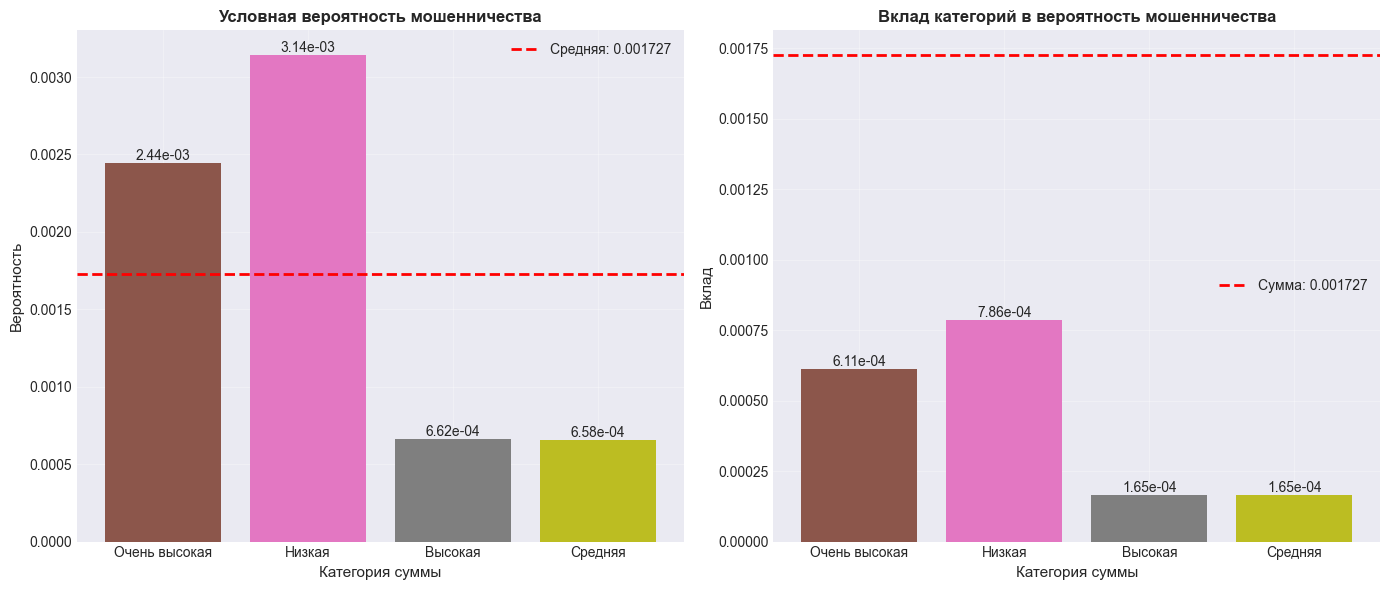

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Левая часть: реальные вероятности
bars1 = ax1.bar(prob_df['Категория суммы'], prob_df['P(Мошенническая|Категория)'],
               color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
ax1.set_title('Условная вероятность мошенничества', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Вероятность', fontsize=11)
ax1.set_xlabel('Категория суммы', fontsize=11)
ax1.axhline(y=df['Class'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Средняя: {df["Class"].mean():.6f}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Добавляем подписи в научной нотации
for bar in bars1:
    height = bar.get_height()
    # Форматируем как 1.73e-03 (читаемо и без спецсимволов)
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2e}', ha='center', va='bottom')

# Правая часть: реальные вклады
bars2 = ax2.bar(prob_df['Категория суммы'], prob_df['Вклад'],
               color=['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
ax2.set_title('Вклад категорий в вероятность мошенничества', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Вклад', fontsize=11)
ax2.set_xlabel('Категория суммы', fontsize=11)
ax2.axhline(y=df['Class'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Сумма: {df["Class"].mean():.6f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Добавляем подписи
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2e}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Вывод.** Формула полной вероятности позволяет вычислить вероятность сложного события (Транзакция мошенническая), разбив его на сценарии, по которым нам проще считать.

## Формула Байерса (формула проверки гипотез)

**Задача.** Мы видим мошенническую транзакцию. Мы хотим понять, к какой категории суммы она, скорее всего, принадлежит. Другими словами, мы хотим найти $P_{\text{Мошенническая}}(\text{Категория суммы})$

Теорема Байеса позволяет это найти: $$P_B (A) = \frac {P(A) * P_A (B)} {P(B)}$$

В нашем случае: $$P_{\text{Мошенническая}} (\text{Категория суммы = i}) = \frac {P(\text{Категория суммы = i}) * P_{\text{Категория суммы = i}} (\text{Мошенническая})} {P(\text{Мошенническая})}$$

In [17]:
print("\n" + "="*70)
print("ТЕОРЕМА БАЙЕСА")
print("="*70)
print("P(Категория | Мошенническая) = [P(Мошенническая | Категория) × P(Категория)] / P(Мошенническая)")
print("="*70)

# P(Fraud) - знаменатель
P_F = df['Class'].mean()

bayes_results = []

for amount_cat in df['Amount_Category'].unique():
    # P(Amount_Category) - априорная вероятность
    P_A = (df['Amount_Category'] == amount_cat).mean()
    
    # P(Fraud | Amount_Category) - правдоподобие
    P_B_given_A = conditional_probability(df, 'Amount_Category', amount_cat, 'Class')
    
    # Применяем теорему Байеса
    P_A_given_B = (P_B_given_A * P_A) / P_F
    
    bayes_results.append({
        'Категория суммы': amount_cat,
        'P(Категория)': P_A,
        'P(Мошенниеская|Категория)': P_B_given_A,
        'P(Категория|Мошенниеская)': P_A_given_B
    })

# Создаем DataFrame
bayes_df = pd.DataFrame(bayes_results)
print("\nРезультаты применения теоремы Байеса:")
print(bayes_df.round(4))


ТЕОРЕМА БАЙЕСА
P(Категория | Мошенническая) = [P(Мошенническая | Категория) × P(Категория)] / P(Мошенническая)

Результаты применения теоремы Байеса:
  Категория суммы  P(Категория)  P(Мошенниеская|Категория)  \
0   Очень высокая        0.2500                     0.0024   
1          Низкая        0.2501                     0.0031   
2         Высокая        0.2492                     0.0007   
3         Средняя        0.2507                     0.0007   

   P(Категория|Мошенниеская)  
0                     0.3537  
1                     0.4553  
2                     0.0955  
3                     0.0955  


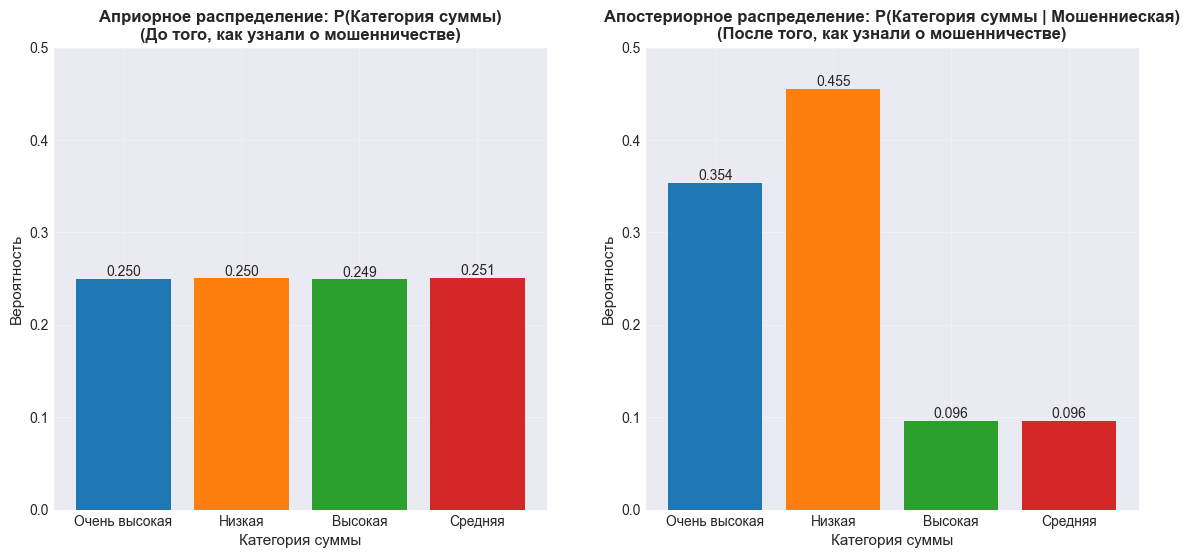

In [18]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Априорное распределение (до наблюдения мошенничества)
bars1 = ax1.bar(bayes_df['Категория суммы'], bayes_df['P(Категория)'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_title('Априорное распределение: P(Категория суммы)\n(До того, как узнали о мошенничестве)', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Вероятность', fontsize=11)
ax1.set_xlabel('Категория суммы', fontsize=11)
ax1.set_ylim(0, 0.5)
ax1.grid(True, alpha=0.3)

# Добавляем подписи
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom')

# Апостериорное распределение (после наблюдения мошенничества)
bars2 = ax2.bar(bayes_df['Категория суммы'], bayes_df['P(Категория|Мошенниеская)'],
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_title('Апостериорное распределение: P(Категория суммы | Мошенниеская)\n(После того, как узнали о мошенничестве)', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Вероятность', fontsize=11)
ax2.set_xlabel('Категория суммы', fontsize=11)
ax2.set_ylim(0, 0.5)
ax2.grid(True, alpha=0.3)

# Добавляем подписи
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom')

plt.show()

**Вывод.** Теорема Байеса позволяет обновлять наши убеждения (о категории суммы транзакции) на основе новых свидетельств (факт мошенничества).